<div align = "center">
    <h3> DECISION TREES AND RANDOM FOREST </h3>
</div>

### Importing Libraries

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import os
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Load and Preprocess  Dataset

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/Pranjal Oza/Elevate_Lab/titanic.csv")

# Basic preprocessing
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df.dropna(inplace=True)

# Encode categorical variable
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train Decision Tree and Visualize

In [6]:
# Train model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

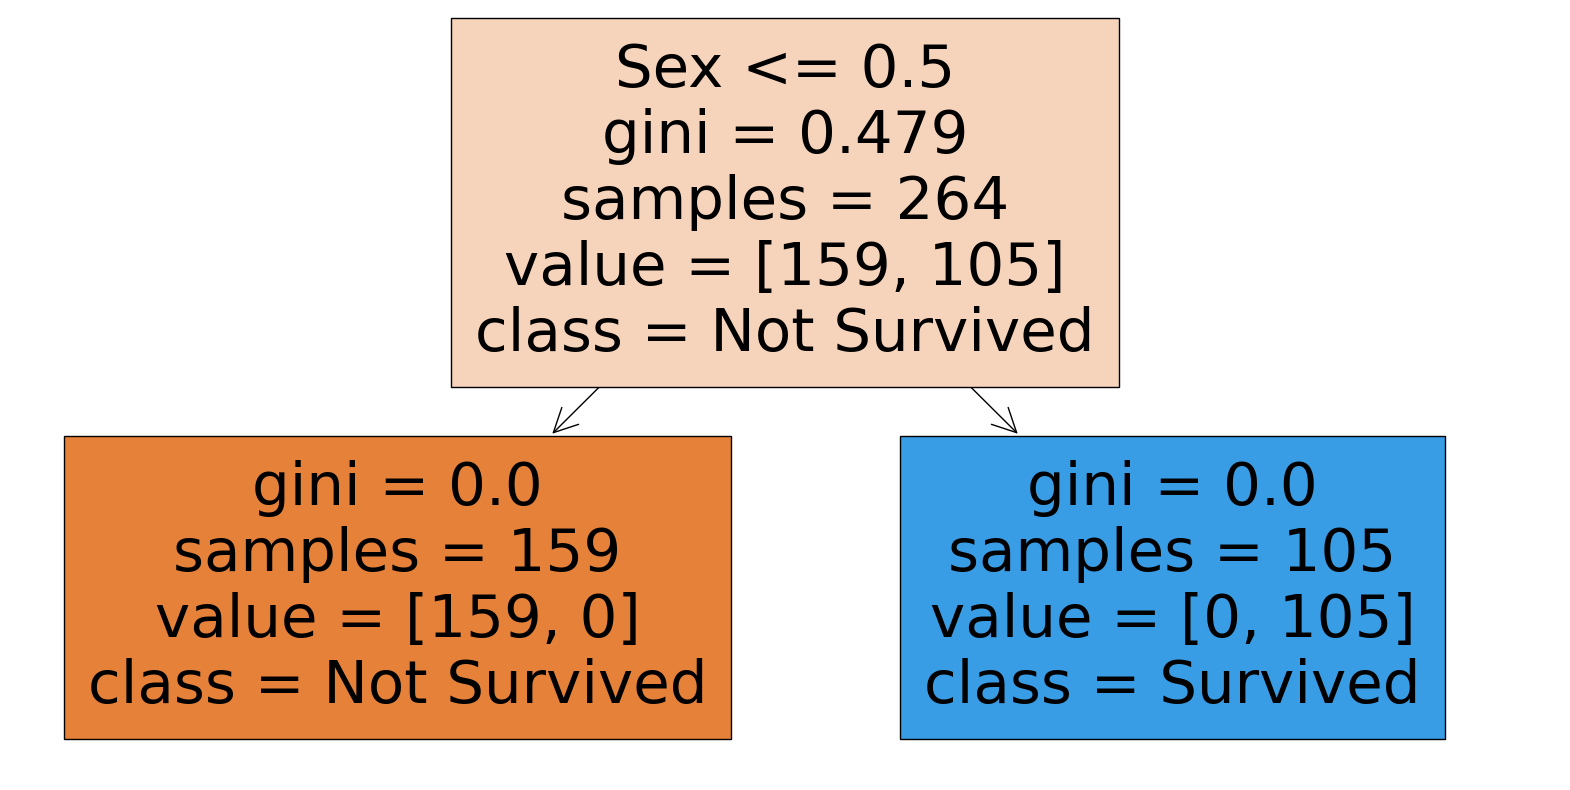

In [7]:
# Visualize
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

### Analyzing Overfitting by Varying Tree Depth

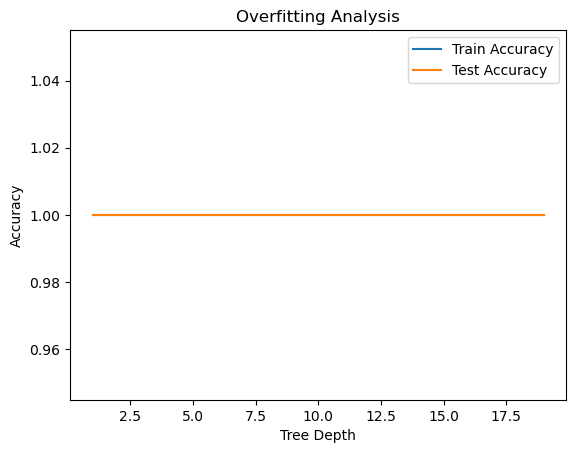

In [8]:
depths = range(1, 20)
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Plot
plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis')
plt.legend()
plt.show()


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

### Train Random Forest and Compare Accuracy

In [10]:

dt_acc = accuracy_score(y_test, dt.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


### Interpret Feature Importances

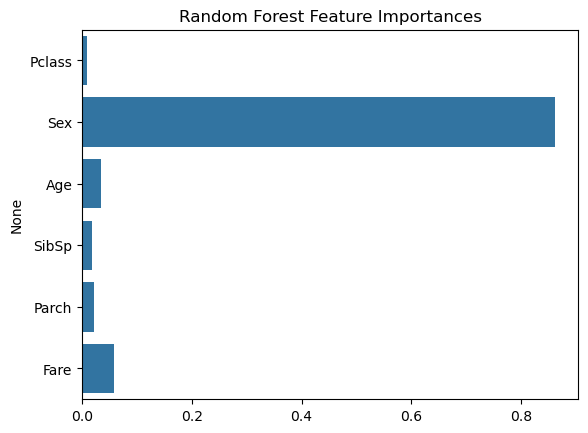

In [11]:
importances = rf.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Random Forest Feature Importances")
plt.show()


### Evaluate with Cross-Validation

In [12]:
dt_cv = cross_val_score(dt, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", dt_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())


Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 1.0


### Confusion Matrix

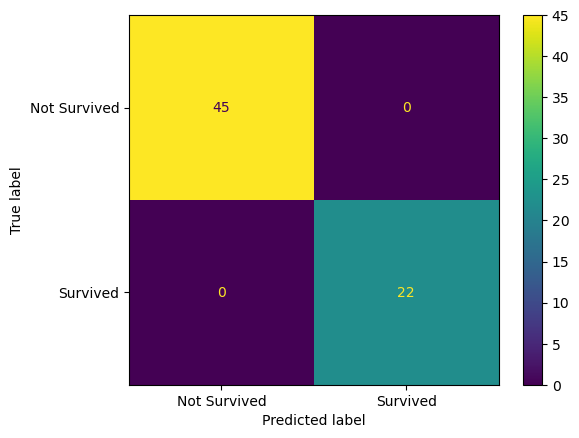

In [15]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot()


### Classification Report

In [17]:
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))


              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        45
    Survived       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

